## Predicting GoSales Transactions with Logistic Regression


<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** Citation: Publisher IBM
Anonymous outdoor equipment purchase data for machine learning examples. Datasource@ https://datascience.ibm.com/</div>



Created by John Ryan 26th April 2017


__1. Overview__

**Question: How do we predict future GoSales transactions of outdoor equipment with the measurements provided?**

The data set provides many categorical and continous variables that allow for the opportunity to implement Machine Learning models to accurately predict future purchasing habits of customers.

Python 2.7 Sci-Kit Learn : http://scikit-learn.org/stable/

**Contents**

- Overview

- Load the data to a pandas data frame

- Missing Value Detection

- Encode Labels

- Cross Validation Train/Test Split

- Creating a Logistic Regression Model

- Evaluate Model Performance:

- Metric 1: Classification Accurracy: % of correct predictions

- Metric 2: Null Accuracy: Accuracy

- Metric 3: ROC Curve

**2. Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**3. Load data** 

In [2]:
#Import the dataset using csv file 
gosales = pd.read_csv("C:/data/GoSales_Tx_LogisticRegression.csv")
gosales.head(5)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,False,M,27,Single,Professional
1,False,F,39,Married,Other
2,False,F,39,Married,Other
3,False,F,56,Unspecified,Hospitality
4,False,M,45,Married,Retired


**Response Variable**

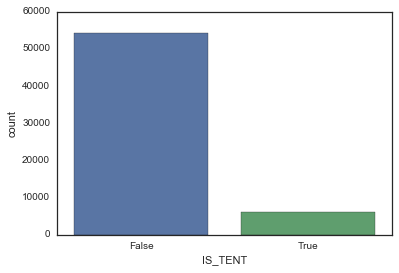

In [3]:
#feature response variable (Y = target) IS_TENT False or True 
sns.countplot(x="IS_TENT", data=gosales)

**Point Plot**

Visualize relationships between genders

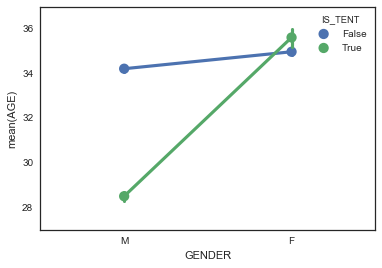

In [5]:
sns.pointplot(x="GENDER", y="AGE", hue="IS_TENT", data=gosales);

**4. Missing Value Detection**

In [4]:
print("Number of NA values : {0}".format((gosales.shape[0] * gosales.shape[1]) - gosales.count().sum()))

Number of NA values : 0


**5. Visualise the Data - Categorical Scatterplot**

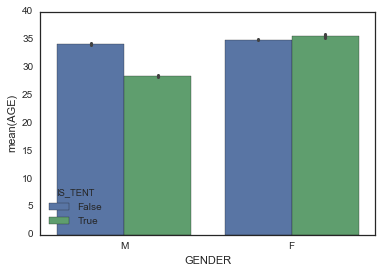

In [5]:
sns.barplot(x="GENDER", y="AGE", hue="IS_TENT", data=gosales);

**6. One Hot Label Encoder**

In [6]:
#Given that we have up to four categorical features we need to encode the labels in order to
#pass the data to the algorithm.
from sklearn.preprocessing import LabelEncoder

for feature in gosales.columns:
    if gosales[feature].dtype=='object':
        le = LabelEncoder()
        gosales[feature] = le.fit_transform(gosales[feature])
gosales.tail(5)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
60247,True,1,24,1,3
60248,False,1,24,1,3
60249,False,0,27,0,4
60250,False,0,20,1,2
60251,False,0,37,0,2


**7. Cross Validation Train/Test Split**

In [8]:
from sklearn.cross_validation import train_test_split
feature_cols = ['GENDER','AGE','MARITAL_STATUS','PROFESSION']
X = gosales[feature_cols]
y = gosales.IS_TENT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**8. Create Logistic Regression Model**

Despite its name Logistic regression is a very powerful classification model where the dependent variable is categorical. In logistic regression we use a "hypothesis class" to make a prediction that a given new example belongs to Benign class Vs the probability that it belongs to the Malignant class.


In [9]:
#Logistic Regression - Classification model
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
# during the fitting process the model is learning the relationship between X_train & y_train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**9. Make class predictions on test data set**

Make class predictions for the test set,we pass X_test the feature matrix for the testing set to the predict () method for the fitted model.Contains outputs of a class prediction True or False for every observation in the testing set which is then stored in an object called "y_pred_class" (see below).

In [11]:
#make class predictions for the test set
y_predict_class = LRmodel.predict(X_test)
y_predict_class
#outputs a class prediction 1 or 0 for every observation in the testing set which
#is then stored in an object called y_pred_class

array([False, False, False, ..., False, False, False], dtype=bool)

**10. Evaluate Model Performance**

**Metric 1: Classification Accurracy: % of correct predictions**

- The first step is to calculate % accurracy by passing y_test and y_predict_class to the accurracy score function.

- y_test contains true response values, for the test set the accuracy score function can tell us what percentage of the predictions in y_pred_class are correct.

In [12]:
#What % of class predictions ae actually correct?
print (metrics.accuracy_score(y_test, y_predict_class))

0.903472083914


**Metric 2: Null Accuracy**

Analysis the class distribution of the test set. When we evaluate the class distribution counts below we see that the False value is present a wopping 13609 times and the True value is present 1454 times. Null accuracy tests that if this model was to predict the dominant class 100% of the time, how often would it be correct?

- Step 1: Get a sense of the distribution of the classes. What is the most dominant class True or False.

- Step 2: Calcualte the percentage of True values contained in y_test.

- Step 3: Calcualte the percentage of False values contained in y_test.

- Step 4: Analyse the Result: Get the basis of null accuracy.

In [13]:
#Step 1: Fuction to display the class distribution
y_test.value_counts()

False    13609
True      1454
Name: IS_TENT, dtype: int64

In [14]:
#Step 2: Calcualte the % of True Values
y_test.mean()

0.096527916085773088

In [15]:
#Step 3: Calcualte the % of False Values
1- y_test.mean()

0.90347208391422695

**Null Accuracy Results** 

90.3% of False values is much greather than 9.6% of True values we can safely suggest that this is the null accuracy for this question. The model will predict 90.3% of the time that a purchase in the store will be False and 9.6% a true purchase, this is not to useful but will provide a basis of what we can compare our logit model against. If we compare the classification accuracy of 90.3% previously calcualted we see our model above to our null accuracy (90.3% also) we cleary see that the classification accuracy does tell us something regaring the underlying distribution of the test set but does not tell us much about what type of errors our model is making.

**Metric 3: Area Under AUC Curve (ROC)**

The ROC curve helps to select a threshold value that balances sensitivity and specificity in a way that makes sense.

AUC is a popular metric. I believe it is a good metric given the unbalaced classes seen above. It is used to judge predictions in binary response (False/True) problem. It is only sensitive to the order determined by the predictions and not their magnitudes.

For other evaluation methods, a user has to choose a cut-off point above which the target variable is part of the positive class (e.g. a logistic regression model returns any real number between False and True - the modeler might decide that predictions greater than 0.5 mean a positive class prediction while a prediction of less than 0.5 mean a negative class prediction). AUC evaluates entries at all cut-off points, giving better insight into how well the classifier is able to separate the two classes.

In [16]:
#predicted probabilties of class 1
y_predicted_prob = LRmodel.predict_proba(X_test)[:,1]
y_predicted_prob

array([ 0.1771451 ,  0.06105373,  0.27435449, ...,  0.11080671,
        0.04057806,  0.08083935])

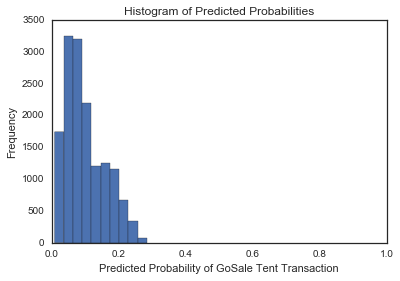

In [17]:
#Analysis the distribution of a numerical variable 
plt.hist(y_predicted_prob, bins= 10)
plt.xlim(0,1)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of GoSale Tent Transaction')
plt.ylabel('Frequency')

**ROC Curve - Sensitivity/Specificity plot**

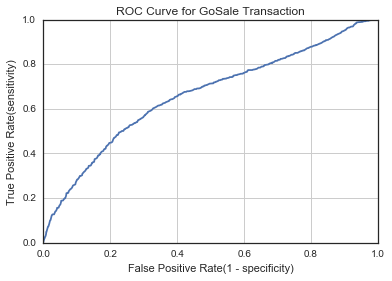

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for GoSale Transaction')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.grid(True)

**ROC Results:**

The Reciever operationg characteristic is used to highlight trade offs between detecting true positives but at the same time trying to reduce false positive results. To create this curve predicted probabilities of the models class are sorted by the largest first down to the smallest. Therefore the closer the curve is to the left hand upper corner of the graph or the largest area under the curve the better the prediction and accuracy of a true positive prediction. 


**Improve Model Performance**

In [28]:
#alter the default predict probabilty from 0.5 to 0.1 to incease the sensitivity of the model
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_predicted_prob, 0.1)[0]

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


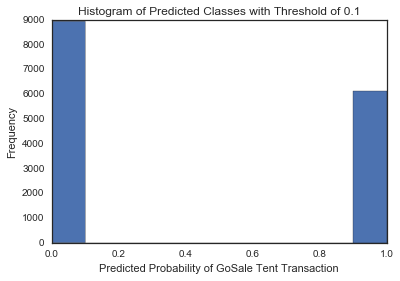

In [30]:
#Analysis the distribution of a numerical variable
plt.hist(y_pred_class, bins= 10)
plt.xlim(0,1)
plt.title('Histogram of Predicted Classes with Threshold of 0.1')
plt.xlabel('Predicted Probability of GoSale Tent Transaction')
plt.ylabel('Frequency')